<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer:
movies.shape

# Formatted Answer:
print("There are " + str(movies.shape[0]) + " rows and " + str(movies.shape[1]) + " columns.")

There are 979 rows and 6 columns.


#### Check the data type of each column.

In [5]:
# Answer:

pd.DataFrame(movies.dtypes, columns=['DataType'])


,DataType
star_rating,float64
title,object
content_rating,object
genre,object
duration,int64
actors_list,object


#### Calculate the average movie duration.

In [6]:
# Answer: 

movies['duration'].mean()

# Formatted Answer:

print("The average movie duration is " + str(int(round(movies['duration'].mean()))) + " minutes.")

The average movie duration is 121 minutes.


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer:

movie_length = movies.sort_values(by='duration', ascending = False)
movie_length['title'].head(1)
movie_length['title'].tail(1)

# Answer Formatted:

print("'"
      + str(movie_length.iloc[0, 1])
      + "'"
      + " is the longest movie at "
      + str(movie_length.iloc[0, 4])
      + " minutes.")

print("'"
      + str(movie_length.iloc[-1, 1])
      + "'"
      + " is the shortest movie at " 
      + str(movie_length.iloc[-1, 4])
      + " minutes.")

'Hamlet' is the longest movie at 242 minutes.
'Freaks' is the shortest movie at 64 minutes.


#### Create a histogram of duration, choosing an "appropriate" number of bins.

Text(0, 0.5, 'Movie Length (Minutes)')

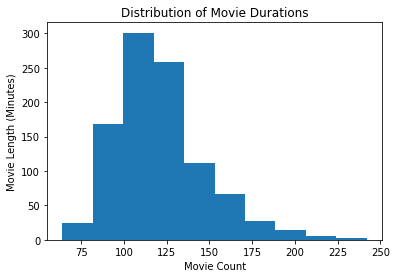

In [8]:
# Answer:

hist = movies.duration.plot(kind='hist', bins=10)
hist.set_title('Distribution of Movie Durations', fontsize = 12)
hist.set_xlabel('Movie Count', fontsize = 10)
hist.set_ylabel('Movie Length (Minutes)', fontsize = 10)


#### Use a box plot to display that same data.

Text(0.5, 1.0, 'Box Plot for Movie Durations')

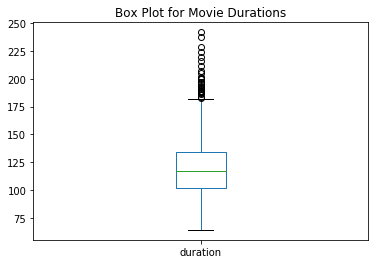

In [9]:
# Answer:

box = movies.duration.plot(kind='box')

box.set_title('Box Plot for Movie Durations', fontsize = 12)


## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:

# Erin question for later - how do I create a dataset with actual columns?

ratings = movies.content_rating.value_counts()

print(ratings)

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64


#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Movie Length (Minutes)')

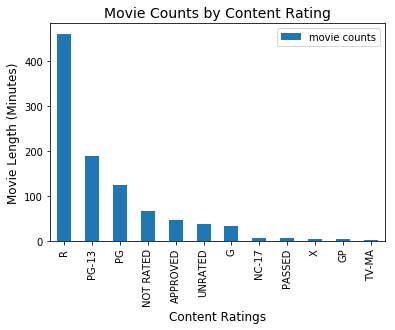

In [143]:
# Answer:

ratings_bar = ratings.plot(kind='bar')

ratings_bar.set_title('Movie Counts by Content Rating', fontsize = 14)
ratings_bar.set_xlabel('Content Ratings', fontsize = 12)
ratings_bar.set_ylabel('Movie Length (Minutes)', fontsize = 12)

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

Text(0, 0.5, 'Movie Length (Minutes)')

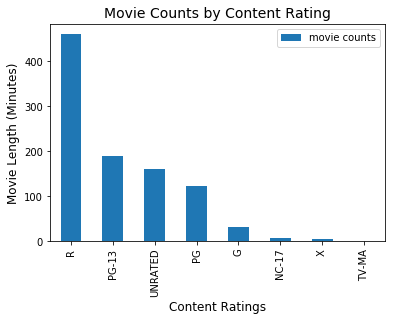

In [12]:
# Answer

# 1. Clone movies dataframe (assuming we want to save these as separate databases, not necessary)

movies_updated = movies

# 2. Replace content ratings & generate counts grouped on rating
movies_updated['content_rating'] = movies_updated['content_rating'].replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED')

ratings_updated = movies_updated[['content_rating', 'title']].groupby(['content_rating']).count().sort_values('title', ascending=False).rename(columns={'title': 'movie counts'})

# 3. Plot new graph
ratings_updated_bar = ratings_updated.plot(kind='bar')
ratings_updated_bar.set_title('Movie Counts by Content Rating', fontsize = 14)
ratings_updated_bar.set_xlabel('Content Ratings', fontsize = 12)
ratings_updated_bar.set_ylabel('Movie Length (Minutes)', fontsize = 12)


#### Convert the following content ratings to "NC-17": X, TV-MA.

Text(0, 0.5, 'Movie Length (Minutes)')

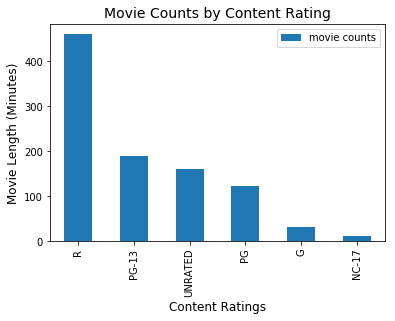

In [13]:
# Answer

# 1. Clone movies dataframe (assuming we want to save these as separate databases, not necessary)

movies_updated_2 = movies_updated

# 2. Replace content ratings & generate counts grouped on rating
movies_updated_2['content_rating'] = movies_updated_2['content_rating'].replace(['X', 'TV-MA'], 'NC-17')

ratings_updated_2 = movies_updated_2[['content_rating', 'title']].groupby(['content_rating']).count().sort_values('title', ascending=False).rename(columns={'title': 'movie counts'})

# 3. Plot new graph
ratings_updated_2_bar = ratings_updated_2.plot(kind='bar')
ratings_updated_2_bar.set_title('Movie Counts by Content Rating', fontsize = 14)
ratings_updated_2_bar.set_xlabel('Content Ratings', fontsize = 12)
ratings_updated_2_bar.set_ylabel('Movie Length (Minutes)', fontsize = 12)

#### Count the number of missing values in each column.

In [14]:
# Answer:

movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [383]:
movies = movies.fillna(value={'content_rating' : 'R'})


,star_rating,title,content_rating,genre,duration,actors_list
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,R,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [21]:
# Answer:

movies_2plus = movies[movies['duration'] >= 120]
movies_under2 = movies[movies['duration'] < 120]

movies_2plus['star_rating'].mean()
movies_under2['star_rating'].mean()

# Formatted Answer 

print("Movies that are 2 hours or longer haver a higher star rating on average (" 
      + str(round(movies_2plus['star_rating'].mean(), 2))
      + ") than that of movies less than 2 hours ("
      + str(round(movies_under2['star_rating'].mean(), 2))
      + ")."
     )


Movies that are 2 hours or longer haver a higher star rating on average (7.95) than that of movies less than 2 hours (7.84).


#### Use a visualization to detect whether there is a relationship between duration and star rating.

There is a loose correlation between these 2 factors.

             star_rating  duration
star_rating     1.000000  0.227149
duration        0.227149  1.000000


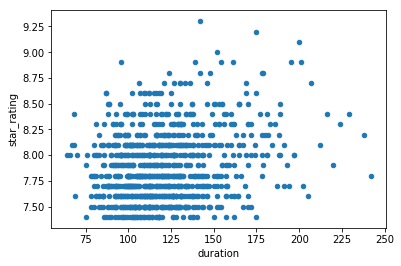

In [24]:
# Answer:

movie_correlations = movies.corr()

movies.plot(kind='scatter', x='duration', y='star_rating');

print("There is a loose correlation between these 2 factors.")
print()
print(movies.corr())

#### Calculate the average duration for each genre.

In [25]:
# Answer:

# Erin question for later -- how to I manipulate mean() value? Like change to an int?

movies[['genre', 'duration']].groupby('genre').mean().sort_values('duration', ascending=False)


,duration
genre,
Western,136.666667
Adventure,134.840000
Biography,131.844156
Drama,126.539568
Action,126.485294
Crime,122.298387
Mystery,115.625000
Thriller,114.200000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

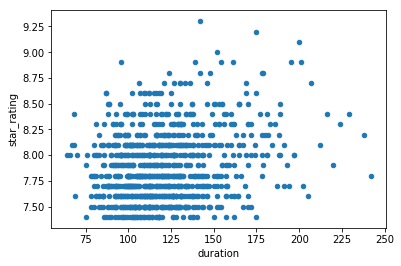

In [26]:
# Answer:

movies.plot(kind='scatter', x='duration', y='star_rating');


#### Determine the top rated movie (by star rating) for each genre.

In [27]:
# Answer:

movies_genre_ratings = movies[['title', 'genre', 'star_rating']].assign(rn=movies.groupby(['genre'])['star_rating'].rank(method = 'first', ascending=False))

top_rated = movies_genre_ratings[movies_genre_ratings['rn'] == 1]

top_rated[['genre', 'title']]

,genre,title
0,Crime,The Shawshank Redemption
3,Action,The Dark Knight
5,Drama,12 Angry Men
6,Western,"The Good, the Bad and the Ugly"
7,Adventure,The Lord of the Rings: The Return of the King
8,Biography,Schindler's List
25,Comedy,Life Is Beautiful
30,Animation,Spirited Away
38,Mystery,Rear Window
39,Horror,Psycho


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [41]:
# Answer:

# Erin question for later - how do I automate this either in an OR statement or an 'is in list' clause?

movies.title.value_counts()

dragon = movies[movies['title'] == 'The Girl with the Dragon Tattoo']
grit = movies[movies['title'] == 'True Grit']
mis = movies[movies['title'] == 'Les Miserables']
vamp = movies[movies['title'] == 'Dracula']

duplicates = dragon.append(grit.append(mis.append(vamp)))

print(duplicates)
print ()
print("All titles are remakes. No real duplicates.")


     star_rating                            title content_rating      genre  \
466          7.9  The Girl with the Dragon Tattoo              R      Crime   
482          7.8  The Girl with the Dragon Tattoo              R      Crime   
662          7.7                        True Grit          PG-13  Adventure   
936          7.4                        True Grit            NaN  Adventure   
678          7.7                   Les Miserables          PG-13      Drama   
924          7.5                   Les Miserables          PG-13      Crime   
703          7.6                          Dracula        UNRATED     Horror   
905          7.5                          Dracula              R     Horror   

     duration                                        actors_list  
466       158  [u'Daniel Craig', u'Rooney Mara', u'Christophe...  
482       152  [u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...  
662       110  [u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...  
936       128    [u'

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [50]:
# Answer (this will not be pretty):

movies['genre'].value_counts()

# Erin question for later - HOW do I automate this!? Basically a having clause from SQL but Python?

drama = movies[movies['genre'] == 'Drama']
comedy = movies[movies['genre'] == 'Comedy']
action = movies[movies['genre'] == 'Action']
crime = movies[movies['genre'] == 'Crime']
biography = movies[movies['genre'] == 'Biography']
adventure = movies[movies['genre'] == 'Adventure']
animation = movies[movies['genre'] == 'Animation']
horror = movies[movies['genre'] == 'Horror']
mystery = movies[movies['genre'] == 'Mystery']

over_10 = drama.append(comedy.append(action.append(crime.append(biography.append(adventure.append(animation.append(horror.append(mystery))))))))

over_10[['genre', 'star_rating']].groupby('genre').mean()


,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:



#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

## Bonus

#### Figure out something "interesting" using the actors data!

In [ ]:
# Note to Jodi / Chris -- honestly just ignore this code. I don't know how to manipulate databases enough to do basic analyses which is honestly pretty frustrating but serve me right for not signing up for office hours sooner!


In [151]:
actors = movies[['title', 'actors_list']]
actors_only = actors[['title']]

Actors_Split = pd.DataFrame(actors['actors_list'].str.split(", u").values.tolist())
Actors_Split = pd.concat([actors_only, Actors_Split], axis = 1, sort=True)

Actors_Split[0] = Actors_Split[0].str.replace( "u'", '', regex=True)
Actors_Split[0] = Actors_Split[0].str.replace( "'", '', regex=True)
Actors_Split[0] = Actors_Split[0].str.replace( "[", '', regex=True)
Actors_Split[1] = Actors_Split[1].str.replace( "'", '', regex=True)
Actors_Split[2] = Actors_Split[2].str.replace( "'", '', regex=True)
Actors_Split[2] = Actors_Split[2].str.replace( "]", '', regex=True)

Actors_Split.columns = ['title','actor1', 'actor2', 'actor3']

movies_actors = movies.join(Actors_Split.set_index('title'), on='title')

movies_actors_1 = movies_actors[['star_rating', 'title', 'genre', 'content_rating', 'duration', 'actor1']].rename(columns={'actor1': 'actor'})
movies_actors_2 = movies_actors[['star_rating', 'title', 'genre', 'content_rating', 'duration', 'actor2']].rename(columns={'actor2': 'actor'})
movies_actors_3 = movies_actors[['star_rating', 'title', 'genre', 'content_rating', 'duration', 'actor3']].rename(columns={'actor3': 'actor'})

actors_final = movies_actors_1.append(movies_actors_2.append(movies_actors_3))


In [152]:
actor_max = actors_final[['star_rating', 'actor']].groupby('actor').max()
actor_min = actors_final[['star_rating', 'actor']].groupby('actor').min()
actor_time = actors_final[['duration', 'actor']].groupby('actor').sum()

In [153]:
actor_max.head(5)

,star_rating
actor,
"""Beverly DAngelo""",8.6
"""Catherine OHara""",8.0
"""Chris ODonnell""",8.0
"""Chris ODowd""",7.5
"""Dan OHerlihy""",7.5
